Name: Tsai, Yu-Yun

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn.model_selection import GridSearchCV

1. Multi-class and Multi-Label Classification Using Support Vector Machines
(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics. uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
df1 = pd.read_csv('../data/Frogs_MFCCs.csv')
df1

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
y = df1[['Family','Genus','Species']]
X = df1.drop(['Family','Genus','Species', 'RecordID'], axis=1)
y

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
854,1.000000,-0.110506,0.296575,0.572484,0.106014,0.071651,0.026353,-0.057816,0.152764,0.184266,...,-0.003411,0.122159,0.188889,-0.048002,-0.197944,0.002446,0.106280,-0.000289,-0.030885,-0.013138
4279,1.000000,0.220624,0.242714,0.687612,0.278120,0.048901,-0.175033,0.045482,0.194987,-0.026137,...,0.239639,-0.258718,-0.181393,0.224083,0.189132,-0.086415,-0.142950,-0.061968,0.140081,0.177679
6530,1.000000,0.537389,0.411925,0.220964,0.082649,0.116707,0.030271,-0.025917,0.095736,0.055280,...,0.071234,-0.047150,-0.027571,0.040844,0.008839,0.020528,0.032644,-0.030302,-0.009163,0.073411
4445,1.000000,0.113471,0.141275,0.510700,0.171047,0.004309,-0.152609,-0.014724,0.187484,-0.021925,...,0.231469,-0.201889,-0.133748,0.223116,0.169808,-0.124180,-0.159812,-0.033042,0.185773,0.165372
4218,1.000000,0.240949,0.216480,0.461523,0.117414,-0.062445,-0.130187,0.112749,0.340813,0.070309,...,0.266955,-0.147366,-0.291212,0.032346,0.178339,0.043587,-0.123294,-0.113868,0.099137,0.182885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1.000000,-0.142398,-0.135605,0.489808,0.346600,0.112585,0.022297,-0.050188,-0.039155,0.179645,...,-0.139727,0.206907,0.180459,-0.081065,-0.159301,-0.052028,0.050629,0.090996,0.076187,-0.029321
3264,1.000000,0.176691,0.010582,0.426816,0.159823,0.082286,-0.081110,0.071147,0.316694,0.125304,...,0.285737,0.008472,-0.254754,0.020172,0.245519,0.135507,-0.092764,-0.155646,0.041699,0.261644
1653,0.689976,1.000000,0.303498,0.320465,0.206091,0.334999,0.091622,0.184121,0.004056,0.002416,...,0.084504,0.019744,-0.110357,-0.097476,-0.036028,-0.066845,-0.007471,-0.004674,0.035157,0.028860
2607,1.000000,0.378678,0.430880,0.618243,0.075128,-0.008888,-0.106768,0.067784,0.266808,-0.084165,...,0.366652,-0.177005,-0.321548,0.112632,0.199011,-0.030374,-0.083440,-0.081388,0.101548,0.165429


In [5]:
y_train

,Family,Genus,Species
854,Dendrobatidae,Ameerega,Ameeregatrivittata
4279,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
6530,Hylidae,Hypsiboas,HypsiboasCordobae
4445,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4218,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
4931,Hylidae,Dendropsophus,HylaMinuta
3264,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1653,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2607,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

Ans:

Exact match ratio : If the characters of the prediction exactly match the characters of (one of) the True Answer(s), EM = 1, otherwise EM = 0. One of the shortcoming of Exact match ratio is that it does not account for partially correct labels. 

Hamming loss : Hamming Loss computes the proportion of incorrectly predicted labels to the total number of labels.

ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [6]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score

In [7]:
y.columns.values

array(['Family', 'Genus', 'Species'], dtype=object)

In [8]:
lambdas=[0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,100]
param = {'gamma': lambdas, 'C': [1, 10, 50, 100, 500, 1000]}

In [9]:
# Gaussian kernels:rbf, one versus all classifiers: 'ovr'(one-vs-rest)
y_pred={}
exact_match={}

for i in y.columns.values:
    svc_1b = SVC(kernel='rbf', decision_function_shape='ovr', tol=0.7)
    grid_1b = GridSearchCV(svc_1b, param, cv = StratifiedKFold(n_splits=10))
    grid_1b.fit(X_train, y_train[i].values.ravel())
    y_pred[i]= grid_1b.predict(X_test)
    #prediction
    print('class{} prediction: {}'.format(i, y_pred[i]))
    #best params
    best_params_1b = grid_1b.best_params_
    print('class{} best parameters: {}'.format(i, best_params_1b))
    #hamming loss
    hamming_loss_1b = hamming_loss(y_test[i], y_pred[i])
    print('class{} hamming loss: {}'.format(i ,hamming_loss_1b))
    #exact match
    exact_match_1b = accuracy_score(y_test[i], y_pred[i])
    print('class{} exact match: {}'.format(i, exact_match_1b))

classFamily prediction: ['Hylidae' 'Hylidae' 'Leptodactylidae' ... 'Hylidae' 'Dendrobatidae'
 'Leptodactylidae']
classFamily best parameters: {'C': 50, 'gamma': 1}
classFamily hamming loss: 0.006484483557202408
classFamily exact match: 0.9935155164427976
classGenus prediction: ['Scinax' 'Dendropsophus' 'Adenomera' ... 'Hypsiboas' 'Ameerega'
 'Adenomera']
classGenus best parameters: {'C': 50, 'gamma': 1}
classGenus hamming loss: 0.009726725335803613
classGenus exact match: 0.9902732746641963
classSpecies prediction: ['ScinaxRuber' 'HylaMinuta' 'AdenomeraHylaedactylus' ...
 'HypsiboasCinerascens' 'Ameeregatrivittata' 'AdenomeraHylaedactylus']
classSpecies best parameters: {'C': 100, 'gamma': 1}
classSpecies hamming loss: 0.009726725335803613
classSpecies exact match: 0.9902732746641963


iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [11]:
scaler = StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [12]:
param_iii = {'C': [1, 10, 50, 100, 500, 1000]}

In [13]:
y_pred_l1={}
exact_match_l1={}

for i in y.columns.values:
    linearsvc = LinearSVC(penalty='l1', multi_class='ovr', loss='squared_hinge', dual=False,random_state=0, tol=0.7)
    grid_l1 = GridSearchCV(linearsvc, param_iii, cv = StratifiedKFold(n_splits=10))
    grid_l1.fit(X_train_scale, y_train[i])
    y_pred_l1[i]= grid_l1.predict(X_test_scale)
    print('class{} predictions: {}'.format(i, y_pred_l1[i]))
    #best params
    best_params_l1 = grid_l1.best_params_
    print('class{} best params: {}'.format(i, best_params_l1))
    #hamming loss
    hamming_loss_l1 = hamming_loss(y_test[i], y_pred_l1[i])
    print('class{} hamming loss: {}'.format(i ,hamming_loss_l1))
    #exact match
    exact_match_l1 = accuracy_score(y_test[i], y_pred_l1[i])
    print('class{} exact match: {}'.format(i, exact_match_l1))

classFamily predictions: ['Hylidae' 'Hylidae' 'Leptodactylidae' ... 'Hylidae' 'Dendrobatidae'
 'Leptodactylidae']
classFamily best params: {'C': 50}
classFamily hamming loss: 0.07086614173228346
classFamily exact match: 0.9291338582677166
classGenus predictions: ['Scinax' 'Dendropsophus' 'Adenomera' ... 'Hypsiboas' 'Ameerega'
 'Adenomera']
classGenus best params: {'C': 10}
classGenus hamming loss: 0.07086614173228346
classGenus exact match: 0.9291338582677166
classSpecies predictions: ['ScinaxRuber' 'HylaMinuta' 'AdenomeraHylaedactylus' ...
 'HypsiboasCordobae' 'Ameeregatrivittata' 'AdenomeraHylaedactylus']
classSpecies best params: {'C': 1}
classSpecies hamming loss: 0.058360352014821676
classSpecies exact match: 0.9416396479851783


iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [14]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [15]:
#Before resampling
Counter(y_train)

Counter({'Family': 1, 'Genus': 1, 'Species': 1})

In [16]:
param_iv = {'C': [1, 10, 50, 100, 500, 1000]}

In [17]:
y_pred_sm={}
exact_match_sm={}

for i in y.columns.values:
    smote = SMOTE()
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train[i])
    linearSVC_sm = LinearSVC(penalty='l1',multi_class='ovr',loss='squared_hinge',dual=False,random_state=0, tol=0.7)
    grid_sm = GridSearchCV(linearSVC_sm, param_iv, cv = StratifiedKFold(n_splits=10))
    grid_sm.fit(X_train_sm, y_train_sm.values.ravel())
    y_pred_sm[i]= grid_sm.predict(X_test)
    #predictions
    print('class{} predictions: {}'.format(i, y_pred_sm[i]))
    #best params
    grid_sm = grid_sm.best_params_
    print('class{} best params: {}'.format(i , grid_sm))
    #hamming loss
    hamming_loss_sm = hamming_loss(y_test[i], y_pred_sm[i])
    print('class{} hamming loss: {}'.format(i ,hamming_loss_sm))
    #exact match
    exact_match_sm = accuracy_score(y_test[i], y_pred_sm[i])
    print('class{} exact match: {}'.format(i, exact_match_sm))

classFamily predictions: ['Hylidae' 'Bufonidae' 'Leptodactylidae' ... 'Hylidae' 'Dendrobatidae'
 'Leptodactylidae']
classFamily best params: {'C': 10}
classFamily hamming loss: 0.1222788327929597
classFamily exact match: 0.8777211672070403
classGenus predictions: ['Scinax' 'Dendropsophus' 'Adenomera' ... 'Osteocephalus' 'Ameerega'
 'Adenomera']
classGenus best params: {'C': 50}
classGenus hamming loss: 0.10930986567855489
classGenus exact match: 0.8906901343214451
classSpecies predictions: ['ScinaxRuber' 'HylaMinuta' 'AdenomeraHylaedactylus' ...
 'OsteocephalusOophagus' 'Ameeregatrivittata' 'AdenomeraHylaedactylus']
classSpecies best params: {'C': 50}
classSpecies hamming loss: 0.0555812876331635
classSpecies exact match: 0.9444187123668365


2. K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo Simulation: Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [18]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics import hamming_loss
from scipy.spatial.distance import hamming
from statistics import mean

In [19]:
df2 = df1.copy()
df2.drop(columns = 'RecordID')

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [20]:

best_k = []
max_silhouette=[]
k1=range(2,51,1)


for i in range(1,51,1):
    silhouette=[]
    print ('Iteration:' ,i)
    
    for k in range(2,51,1):
        kmeans = KMeans(n_clusters = k, random_state = i, tol=0.7)
        kmeans.fit(X)
        silhouette.append(silhouette_score(X, kmeans.labels_, metric = 'euclidean'))

    k_index = k1[silhouette.index(max(silhouette))]
    best_k.append(k_index)
        
    print('optimal k:', k_index)
    print('optimal silhoouette scores', max(silhouette))

    

Iteration: 1
optimal k: 4
optimal silhoouette scores 0.3786599801479794
Iteration: 2
optimal k: 4
optimal silhoouette scores 0.3852285514763241
Iteration: 3
optimal k: 4
optimal silhoouette scores 0.3812392629188373
Iteration: 4
optimal k: 4
optimal silhoouette scores 0.38022235210549543
Iteration: 5
optimal k: 4
optimal silhoouette scores 0.38090857019840174
Iteration: 6
optimal k: 4
optimal silhoouette scores 0.3783716400433173
Iteration: 7
optimal k: 4
optimal silhoouette scores 0.38249543129716485
Iteration: 8
optimal k: 4
optimal silhoouette scores 0.38245764866979354
Iteration: 9
optimal k: 4
optimal silhoouette scores 0.38176476778060986
Iteration: 10
optimal k: 4
optimal silhoouette scores 0.3820128059378345
Iteration: 11
optimal k: 4
optimal silhoouette scores 0.37894162330624565
Iteration: 12
optimal k: 4
optimal silhoouette scores 0.38060220728123373
Iteration: 13
optimal k: 4
optimal silhoouette scores 0.3816645936839666
Iteration: 14
optimal k: 4
optimal silhoouette scores

In [21]:
df2a = pd.DataFrame()
df2a = df2a.assign(optimal_k = best_k, silhouette_score = max(silhouette))
df2a

,optimal_k,silhouette_score
0,4,0.382049
1,4,0.382049
2,4,0.382049
3,4,0.382049
4,4,0.382049
5,4,0.382049
6,4,0.382049
7,4,0.382049
8,4,0.382049
9,4,0.382049



(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [22]:
df1_new = df1.drop('RecordID', axis=1)
df1_new

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [23]:
label_list = []

for i in range(0,50,1):
    klables=[]

    kmeans_2b = KMeans(n_clusters = df2a['optimal_k'][i], random_state = i, tol=0.7)
    kmeans_2b.fit(X)
    klables.append(kmeans_2b.labels_)
    df1_new['cluster']=kmeans_2b.labels_
    label_list.append(df1_new.groupby(['cluster']).agg(lambda x:x.value_counts().index[0])[['Family','Genus','Species']]) 
    print('Lables:', klables)    

Lables: [array([1, 1, 1, ..., 1, 1, 1], dtype=int32)]
Lables: [array([0, 0, 0, ..., 0, 0, 0], dtype=int32)]
Lables: [array([2, 2, 2, ..., 2, 2, 2], dtype=int32)]
Lables: [array([0, 0, 0, ..., 0, 0, 0], dtype=int32)]
Lables: [array([3, 3, 3, ..., 3, 3, 3], dtype=int32)]
Lables: [array([2, 2, 2, ..., 2, 2, 2], dtype=int32)]
Lables: [array([1, 1, 1, ..., 1, 1, 1], dtype=int32)]
Lables: [array([2, 2, 2, ..., 2, 2, 2], dtype=int32)]
Lables: [array([1, 1, 1, ..., 1, 1, 1], dtype=int32)]
Lables: [array([2, 2, 2, ..., 2, 2, 2], dtype=int32)]
Lables: [array([2, 2, 2, ..., 2, 2, 2], dtype=int32)]
Lables: [array([3, 3, 3, ..., 3, 3, 3], dtype=int32)]
Lables: [array([2, 2, 2, ..., 2, 2, 2], dtype=int32)]
Lables: [array([2, 2, 2, ..., 2, 2, 2], dtype=int32)]
Lables: [array([2, 2, 2, ..., 2, 2, 2], dtype=int32)]
Lables: [array([3, 3, 3, ..., 3, 3, 3], dtype=int32)]
Lables: [array([3, 3, 3, ..., 3, 3, 3], dtype=int32)]
Lables: [array([1, 1, 1, ..., 1, 1, 1], dtype=int32)]
Lables: [array([4, 4, 4, ...

In [24]:
label_list

[                  Family      Genus                 Species
 cluster                                                    
 0        Leptodactylidae  Adenomera  AdenomeraHylaedactylus
 1                Hylidae  Hypsiboas       HypsiboasCordobae
 2        Leptodactylidae  Adenomera          AdenomeraAndre
 3                Hylidae  Hypsiboas    HypsiboasCinerascens,
                   Family      Genus                 Species
 cluster                                                    
 0          Dendrobatidae   Ameerega      Ameeregatrivittata
 1        Leptodactylidae  Adenomera  AdenomeraHylaedactylus
 2                Hylidae  Hypsiboas    HypsiboasCinerascens
 3                Hylidae  Hypsiboas       HypsiboasCordobae,
                   Family      Genus                 Species
 cluster                                                    
 0                Hylidae  Hypsiboas       HypsiboasCordobae
 1        Leptodactylidae  Adenomera  AdenomeraHylaedactylus
 2                Hyli

(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.


In [25]:
from scipy.spatial.distance import hamming

In [26]:
df2_new = df1.drop('RecordID', axis=1)
df2_new

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [27]:
label_list[0]

,Family,Genus,Species
cluster,,,
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Hylidae,Hypsiboas,HypsiboasCinerascens


In [28]:
#hamming loss
hamming_loss_family = []
hamming_loss_genus = []
hamming_loss_species = []
#hamming distance
hamming_score_family = []
hamming_score_genus = []
hamming_score_species = []
#hamming distance
hamming_distance_family = []
hamming_distance_genus = []
hamming_distance_species = []
df_2c = pd.DataFrame()
label_list_2c=[]

for i in range(0,50,1):
    klables_2c=[]
    

    kmeans_2c = KMeans(n_clusters = df2a['optimal_k'][i], random_state = i, tol=0.7)
    kmeans_2c.fit(X)
    klables_2c.append(kmeans_2c.labels_)
    df2_new['cluster']=kmeans_2c.labels_
    #group by
    label_list_2c.append(df2_new.groupby(['cluster']).agg(lambda x:x.value_counts().index[0])[['Family','Genus','Species']])
    #join dataframe
    df_2c = df2_new.merge(label_list_2c[i], how='left', left_on = ['cluster'], right_on=['cluster'])
    #hamming loss
    hamming_loss_family.append(hamming_loss(df_2c['Family_x'], df_2c['Family_y']))
    hamming_loss_genus.append(hamming_loss(df_2c['Genus_x'], df_2c['Genus_y']))
    hamming_loss_species.append(hamming_loss(df_2c['Species_x'], df_2c['Species_y']))
    #hamming score
    hamming_score_family.append(1 - hamming_loss(df_2c['Family_x'], df_2c['Family_y']))
    hamming_score_genus.append(1 - hamming_loss(df_2c['Genus_x'], df_2c['Genus_y']))
    hamming_score_species.append(1 - hamming_loss(df_2c['Species_x'], df_2c['Species_y']))
    #hamming distance
    hamming_distance_family.append(hamming(df_2c['Family_x'], df_2c['Family_y']) * len(df_2c['Family_x']))
    hamming_distance_genus.append(hamming(df_2c['Family_x'], df_2c['Family_y']) * len(df_2c['Family_x']))
    hamming_distance_species.append(hamming(df_2c['Family_x'], df_2c['Family_y']) * len(df_2c['Family_x']))
    


In [29]:
df_2c

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_20,MFCCs_21,MFCCs_22,Family_x,Genus_x,Species_x,cluster,Family_y,Genus_y,Species_y
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,2,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,2,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,2,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,2,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,2,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,2,Leptodactylidae,Adenomera,AdenomeraAndre
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,2,Leptodactylidae,Adenomera,AdenomeraAndre
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,2,Leptodactylidae,Adenomera,AdenomeraAndre
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,2,Leptodactylidae,Adenomera,AdenomeraAndre


In [30]:
#hamming loss
df_ham_loss = pd.DataFrame()
df_ham_loss = df_ham_loss.assign(Family = hamming_loss_family, Genus = hamming_loss_genus, Species = hamming_loss_species)
df_ham_loss

,Family,Genus,Species
0,0.175678,0.254621,0.273523
1,0.199722,0.236136,0.252259
2,0.164420,0.254621,0.317443
3,0.208478,0.244336,0.260181
4,0.202919,0.238638,0.254065
5,0.216956,0.254482,0.272272
6,0.193607,0.229465,0.244892
7,0.213065,0.249201,0.264072
8,0.216400,0.254343,0.270466
9,0.218485,0.258652,0.276303


In [31]:
#hamming loss
ham_loss_interation=[]
for i in range(0,50):
    ham_loss_interation.append(mean(df_ham_loss.iloc[i,:]))

In [32]:
#hamming score
df_ham_score = pd.DataFrame()
df_ham_score = df_ham_score.assign(Family = hamming_score_family, Genus = hamming_score_genus, Species = hamming_score_species)

ham_score_interation=[]
for i in range(0,50):
    ham_score_interation.append(mean(df_ham_score.iloc[i,:]))

In [33]:
#hamming distance
df_ham_distance = pd.DataFrame()
df_ham_distance = df_ham_distance.assign(Family = hamming_distance_family, Genus = hamming_distance_genus,
                                         Species = hamming_distance_species)

ham_distance_interation=[]
for i in range(0,50):
    ham_distance_interation.append(mean(df_ham_distance.iloc[i,:]))

In [34]:
data = {'Hamming Loss':ham_loss_interation,'Hamming Score':ham_score_interation,
        'Hamming Distance':ham_distance_interation}
df_2c_all = pd.DataFrame(data)

df_2c_all

,Hamming Loss,Hamming Score,Hamming Distance
0,0.234607,0.765393,1264.0
1,0.229372,0.770628,1437.0
2,0.245495,0.754505,1183.0
3,0.237665,0.762335,1500.0
4,0.231874,0.768126,1460.0
5,0.247904,0.752096,1561.0
6,0.222655,0.777345,1393.0
7,0.242113,0.757887,1533.0
8,0.247070,0.752930,1557.0
9,0.251147,0.748853,1572.0


In [35]:
df_2c_all.describe().iloc[1:3,:]

,Hamming Loss,Hamming Score,Hamming Distance
mean,0.230962,0.769038,1417.360000
std,0.025139,0.025139,181.154547


3. ISLR 12.6.2

In [36]:
from IPython.display import Image
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

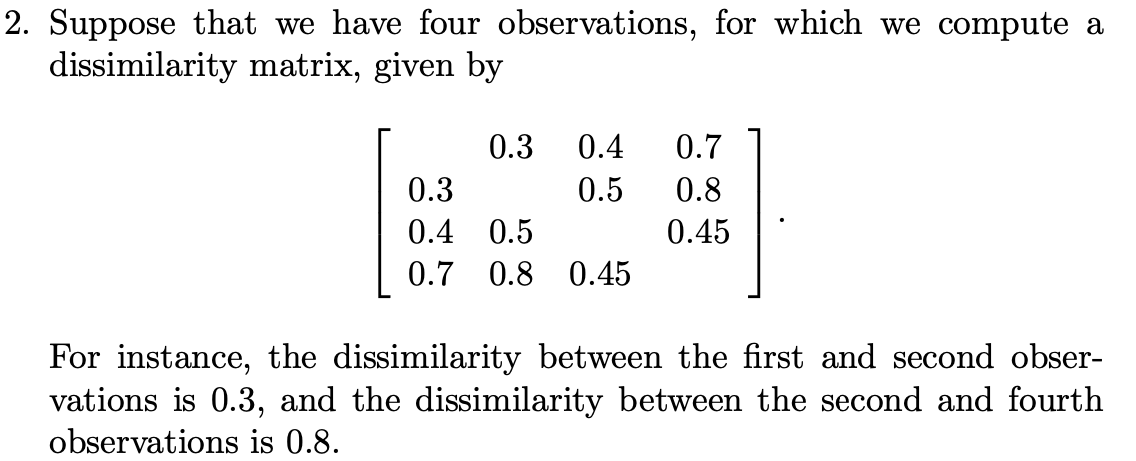

In [37]:
Image(filename='ISLR12.6.3.png',width=550, height=200)

(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa- tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.


In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

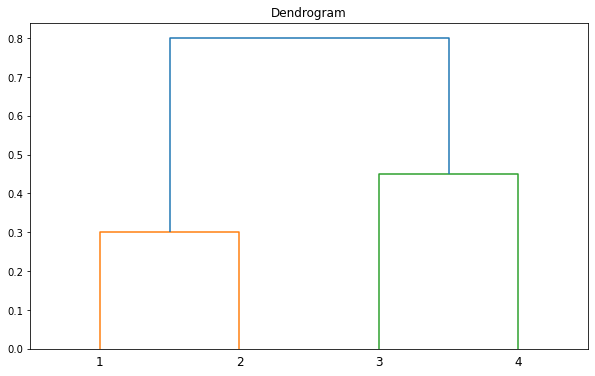

In [39]:
data = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
data_dists = squareform(data)

linkage = linkage(data_dists, method='complete')

fig = plt.figure(figsize=(10,6))
dendrogram(linkage, labels=['1','2','3','4'])

plt.title('Dendrogram')
plt.show()

(b) Repeat (a), this time using single linkage clustering.

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

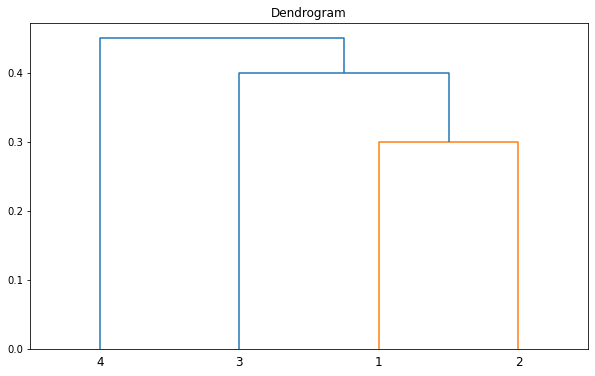

In [41]:
data = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
data_dists = squareform(data)

linkage_b = linkage(data_dists, method='single')

fig = plt.figure(figsize=(10,6))
dendrogram(linkage_b, labels=['1','2','3','4'])

plt.title('Dendrogram')
plt.show()

(c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

Ans: Cluster A: Observations 1 and 2,
     Cluster B: Observations 3 and 4.
     

(d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?


Ans: Cluster A:Observations 1, 2 and 3. Cluster B: Observations 4.


(e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

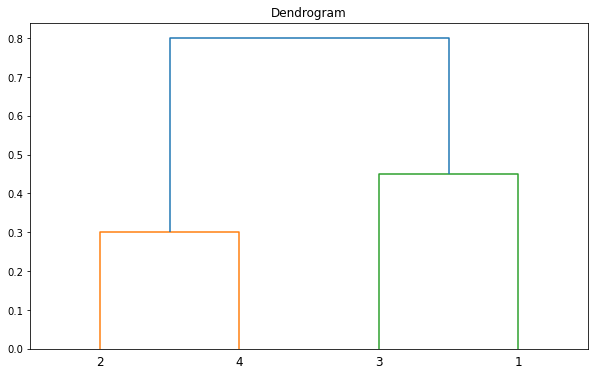

In [42]:
linkage_e = linkage(data_dists, method='complete')

fig = plt.figure(figsize=(10,6))
dendrogram(linkage_e, labels=['2','4','3','1'])


plt.title('Dendrogram')
plt.show()

References:

1. silhouette score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
2. GridsearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
3. Kmeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
4. format method: https://www.geeksforgeeks.org/python-string-format-method/
5. Optimak K method: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
6. hamming distance: https://www.statology.org/hamming-distance-python/
7. SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
8. hamming loss: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
9. max index: https://www.pythonpool.com/python-list-max-index/
10. standardscaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
11. linear SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
12. group by count: https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
13. linkage: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
14. dendrogram: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

ISLR: https://www.geeksforgeeks.org/scipy-cluster-hierarchy-dendrogram/